# **Python Basics for City Data**: An Introductory Tutorial Using Chicago's Municipal Datasets
# Tutorial Part I

***

### **Step 1: Import Necessary Libraries**

Although libraries only need to be installed once, we need to import them in every new Jupyter Notebook or Python script. 


In [2]:
import pandas as pd                   #Pandas: Provides data structures and data analysis tools (e.g., DataFrame for tabular data).
import numpy as np                    #NumPy: Provides support for arrays, matrices, and high-level mathematical functions to operate on these data structures.
import seaborn as sns                 #Seaborn: Based on Matplotlib, it provides a high-level interface for drawing attractive and informative statistical graphics.
from matplotlib import pyplot as plt  #Matplotlib's pyplot: Used for creating static, interactive, and animated visualizations in Python.

***

### **Step 2: Load and Inspect the Data**

#### 2.1 

- We will load the dataset `Chicago_Public_Schools_-_School_Progress_Reports_SY2223_20240122.csv` into a Pandas DataFrame using the `pd.read_csv()` function from the Pandas library. 

- Specify the file path as `'Data/Chicago_Public_Schools_-_School_Progress_Reports_SY2223_20240122.csv'`. 

- We will assign the resulting DataFrame to the variable `cps_data`. This will enable us to work with the CSV file data as a DataFrame in Pandas.

In [3]:
cps_data = pd.read_csv('../Data/Chicago_Public_Schools_-_School_Progress_Reports_SY2223_20240122.csv')

#### 2.2 
We'll take a look at the first few rows (by using `.head()`) to understand the structure of the data.

In [4]:
cps_data.head()

,School_ID,Short_Name,Long_Name,School_Type,Primary_Category,Address,City,State,Zip,Phone,...,Attainment_SAT_Grade_11_School_Pct,Attainment_SAT_Grade_11_School_Lbl,Attainment_All_Grades_School_Pct,Attainment_All_Grades_School_Lbl,Growth_PSAT_Math_Grade_10_School_Pct,Growth_PSAT_Math_Grade_10_School_Lbl,Growth_SAT_Reading_Grade_11_School_Pct,Growth_SAT_Reading_Grade_11_School_Lbl,Growth_SAT_Math_Grade_11_School_Pct,Growth_SAT_Math_Grade_11_School_Lbl
0,610125,RUIZ,Irma C Ruiz Elementary School,Neighborhood,ES,2410 S LEAVITT ST,Chicago,Illinois,60608,773-535-4825,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,609728,ROOSEVELT HS,Theodore Roosevelt High School,Neighborhood,HS,3436 W WILSON AVE,Chicago,Illinois,60625,773-534-5000,...,9.9,9.9,17.1,17.1,NaN,NaN,NaN,NaN,NaN,NaN
2,610040,LLOYD,Henry D Lloyd Elementary School,Neighborhood,ES,2103 N LAMON AVE,Chicago,Illinois,60639,773-534-3070,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,609983,HEDGES,James Hedges Elementary School,Neighborhood,ES,4747 S WINCHESTER AVE,Chicago,Illinois,60609,773-535-7360,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,610534,SKINNER NORTH,Skinner North,Classical,ES,640 W SCOTT ST,Chicago,Illinois,60610,773-534-8500,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


#### 2.3 

The dataset is very big, but we only want to use some of the data. 

- We can take a look at all of the columnsby using `.columns` after the name of the dataframe.

- Adding `.tolist()` to the end of the dataframe allows us to more easily read the data as a list<sup>*</sup>

###### * Click "scrollable element" in VS code to scroll through the entire list.

In [5]:
cps_data.columns.tolist()

['School_ID',
 'Short_Name',
 'Long_Name',
 'School_Type',
 'Primary_Category',
 'Address',
 'City',
 'State',
 'Zip',
 'Phone',
 'Fax',
 'CPS_School_Profile',
 'Website',
 'Progress_Report_Year',
 'Blue_Ribbon_Award_Year',
 'Excelerate_Award_Gold_Year',
 'Spot_Light_Award_Year',
 'Improvement_Award_Year',
 'Excellence_Award_Year',
 'Student_Growth_Rating',
 'Student_Growth_Description',
 'Growth_Reading_Grades_Tested_Pct_ES',
 'Growth_Reading_Grades_Tested_Label_ES',
 'Growth_Math_Grades_Tested_Pct_ES',
 'Growth_Math_Grades_Tested_Label_ES',
 'Student_Attainment_Rating',
 'Student_Attainment_Description',
 'Attainment_Reading_Pct_ES',
 'Attainment_Reading_Lbl_ES',
 'Attainment_Math_Pct_ES',
 'Attainment_Math_Lbl_ES',
 'Culture_Climate_Rating',
 'Culture_Climate_Description',
 'School_Survey_Student_Response_Rate_Pct',
 'School_Survey_Student_Response_Rate_Avg_Pct',
 'School_Survey_Teacher_Response_Rate_Pct',
 'School_Survey_Teacher_Response_Rate_Avg_Pct',
 'School_Survey_Parent_Respon

*** 
### **Step 3: Data Cleaning and Preperation**

Before analyzing the data, let's ensure it is clean and formatted correctly.

#### 3.1 

In this notebook, we only want to work with the following columns:

- `School_ID`: Unique identifier for each school.

- `Short_Name`: Abbreviated name of the school, used for easier identification.

- `Zip`: Postal zip code where the school is located.

- `Primary_Category`: Type of school, typically categorized as High School (HS), Middle School (MS), Elementary School (ES).

- `Attainment_All_Grades_School_Pct`: The percentile ranking of the school's overall performance across all grades compared to the national average.

- `Attainment_PSAT_Grade_9_School_Pct`: The percentile ranking of the school's performance for 9th grade students taking the PSAT, compared to the national average.

- `Attainment_PSAT_Grade_10_School_Pct`: The percentile ranking of the school's performance for 10th grade students taking the PSAT, compared to the national average.

- `School_Survey_Involved_Families`: Survey results indicating the level of family involvement and engagement within the school community.

- `School_Survey_Safety`: Survey results indicating the perceived safety within the school.

- `School_Survey_Supportive_Environment`: Survey results indicating the perceived supportiveness of the school environment.

We can select these columns from the `cps_data` dataframe and assign it to the same variable name.


In [6]:
cps_data = cps_data[['School_ID','Short_Name','Zip','Primary_Category','Attainment_All_Grades_School_Pct','Attainment_PSAT_Grade_9_School_Pct',
          'Attainment_PSAT_Grade_10_School_Pct','Attainment_SAT_Grade_11_School_Pct','School_Survey_Involved_Families','School_Survey_Safety',
          'School_Survey_Supportive_Environment']]

cps_data.head()

,School_ID,Short_Name,Zip,Primary_Category,Attainment_All_Grades_School_Pct,Attainment_PSAT_Grade_9_School_Pct,Attainment_PSAT_Grade_10_School_Pct,Attainment_SAT_Grade_11_School_Pct,School_Survey_Involved_Families,School_Survey_Safety,School_Survey_Supportive_Environment
0,610125,RUIZ,60608,ES,0.0,0.0,0.0,0.0,STRONG,NEUTRAL,NEUTRAL
1,609728,ROOSEVELT HS,60625,HS,17.1,29.2,11.8,9.9,NEUTRAL,WEAK,NEUTRAL
2,610040,LLOYD,60639,ES,0.0,0.0,0.0,0.0,NEUTRAL,WEAK,NEUTRAL
3,609983,HEDGES,60609,ES,0.0,0.0,0.0,0.0,WEAK,WEAK,NEUTRAL
4,610534,SKINNER NORTH,60610,ES,0.0,0.0,0.0,0.0,NOT ENOUGH DATA,NOT ENOUGH DATA,NOT ENOUGH DATA


#### 3.2 

For this dataset, we want to work only with High Schools. We can filter the dataset by "dropping" all of the schools that have `ES` in the `Primary Category` column.

In [7]:
#drop Elementary Schools 'ES'
cps_data = cps_data.drop(cps_data[cps_data['Primary_Category'] == 'ES'].index)
#drop Middle Schools'MS'
cps_data = cps_data.drop(cps_data[cps_data['Primary_Category'] == 'MS'].index)

#Reset a new index and drop the previous index 
cps_data = cps_data.reset_index(drop=True) 

# #Drop Rows with NA values
cps_data = cps_data.dropna()


cps_data.head()

,School_ID,Short_Name,Zip,Primary_Category,Attainment_All_Grades_School_Pct,Attainment_PSAT_Grade_9_School_Pct,Attainment_PSAT_Grade_10_School_Pct,Attainment_SAT_Grade_11_School_Pct,School_Survey_Involved_Families,School_Survey_Safety,School_Survey_Supportive_Environment
0,609728,ROOSEVELT HS,60625,HS,17.1,29.2,11.8,9.9,NEUTRAL,WEAK,NEUTRAL
1,610380,WILLIAMS HS,60615,HS,2.6,0.0,0.0,6.7,STRONG,WEAK,STRONG
2,609704,FARRAGUT HS,60623,HS,13.1,19.7,9.8,9.8,WEAK,VERY WEAK,NEUTRAL
3,609723,MARSHALL HS,60624,HS,4.1,9.3,2.8,0.0,NEUTRAL,WEAK,NEUTRAL
4,609709,GAGE PARK HS,60629,HS,8.2,17.3,4.0,2.3,NEUTRAL,WEAK,NEUTRAL


#### 3.3

Next, we will convert school survey responses to an ordinal scale for analysis. 

In [8]:
#Use to see all possible survey responses that will need to be converted to scale

cps_data.School_Survey_Involved_Families.unique()

array(['NEUTRAL', 'STRONG', 'WEAK', 'VERY STRONG', 'NOT ENOUGH DATA',
       'VERY WEAK'], dtype=object)

In [9]:
# Convert school survey responses to an ordinal scale for analysis
survey_map = {'VERY STRONG': 5, 'STRONG': 4, 'NEUTRAL': 3, 'NOT ENOUGH DATA': 0, 'WEAK': 2,'VERY WEAK': 1}
cps_data['School_Survey_Involved_Families'] = cps_data['School_Survey_Involved_Families'].map(survey_map)
cps_data['School_Survey_Safety'] = cps_data['School_Survey_Safety'].map(survey_map)
cps_data['School_Survey_Supportive_Environment'] = cps_data['School_Survey_Supportive_Environment'].map(survey_map)

cps_data.head()

,School_ID,Short_Name,Zip,Primary_Category,Attainment_All_Grades_School_Pct,Attainment_PSAT_Grade_9_School_Pct,Attainment_PSAT_Grade_10_School_Pct,Attainment_SAT_Grade_11_School_Pct,School_Survey_Involved_Families,School_Survey_Safety,School_Survey_Supportive_Environment
0,609728,ROOSEVELT HS,60625,HS,17.1,29.2,11.8,9.9,3,2,3
1,610380,WILLIAMS HS,60615,HS,2.6,0.0,0.0,6.7,4,2,4
2,609704,FARRAGUT HS,60623,HS,13.1,19.7,9.8,9.8,2,1,3
3,609723,MARSHALL HS,60624,HS,4.1,9.3,2.8,0.0,3,2,3
4,609709,GAGE PARK HS,60629,HS,8.2,17.3,4.0,2.3,3,2,3


#### 3.4 

Next, we'll preform a data cleaning operation on the `cps_data` DataFrame, specifically targeting the columns listed in the attainment_columns list, which includes columns related to school attainment percentages. 

We will also fill missing values for attainment percentages with the mean of each column. 
* `.apply(lambda x: ...)`: The apply function is used to apply a function along the axis of the DataFrame (by default, column-wise). Here, it applies a lambda function to each column selected by cps_data[attainment_columns].

* `lambda x: x.fillna(x.mean())`: This lambda function takes each column x (which represents one of the attainment metrics) and replaces all its missing values (NaN values) with the mean of that column. The fillna function is used for replacing missing values, and x.mean() computes the mean of the column excluding NaN values.

In [10]:
# Designate the attainment columns. 
attainment_columns = ['Attainment_All_Grades_School_Pct', 'Attainment_PSAT_Grade_9_School_Pct', 'Attainment_PSAT_Grade_10_School_Pct', 'Attainment_SAT_Grade_11_School_Pct']

#Fill in missing values with the mean of each column.
cps_data[attainment_columns] = cps_data[attainment_columns].apply(lambda x: x.fillna(x.mean()))

cps_data[attainment_columns].head()

,Attainment_All_Grades_School_Pct,Attainment_PSAT_Grade_9_School_Pct,Attainment_PSAT_Grade_10_School_Pct,Attainment_SAT_Grade_11_School_Pct
0,17.1,29.2,11.8,9.9
1,2.6,0.0,0.0,6.7
2,13.1,19.7,9.8,9.8
3,4.1,9.3,2.8,0.0
4,8.2,17.3,4.0,2.3


***

### **Step 4: Data Analysis**
Let's perform some basic data analysis to understand the performance and perceptions in different schools.

#### 4.1 School Performance by Zip Code

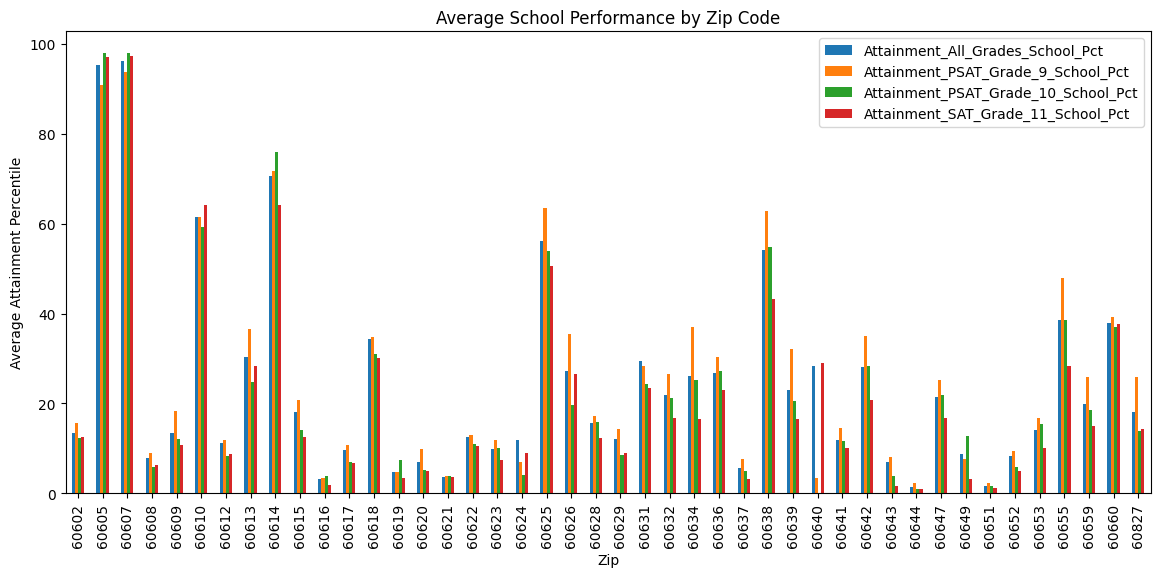

In [11]:
# Calculate average attainment for all grades by zip code
average_attainment_by_zip = cps_data.groupby('Zip')[attainment_columns].mean()

# PLOTTING
#<plot_type> Include 'line','scatter','bar','box', and'pie'. Choose which is BEST. 
#<x>,<y>: Choose the dimensions of the figure 
average_attainment_by_zip.plot(kind='bar', figsize=(14, 6), title='Average School Performance by Zip Code') #<Figure Title>: Choose title for figure 


plt.ylabel('Average Attainment Percentile')  #<yTitle>: Choose label for Y axis 
plt.show()



#### 4.2 Correlation Between School Surveys and Performance

Let's examine if there's any correlation between the school surveys and performance.

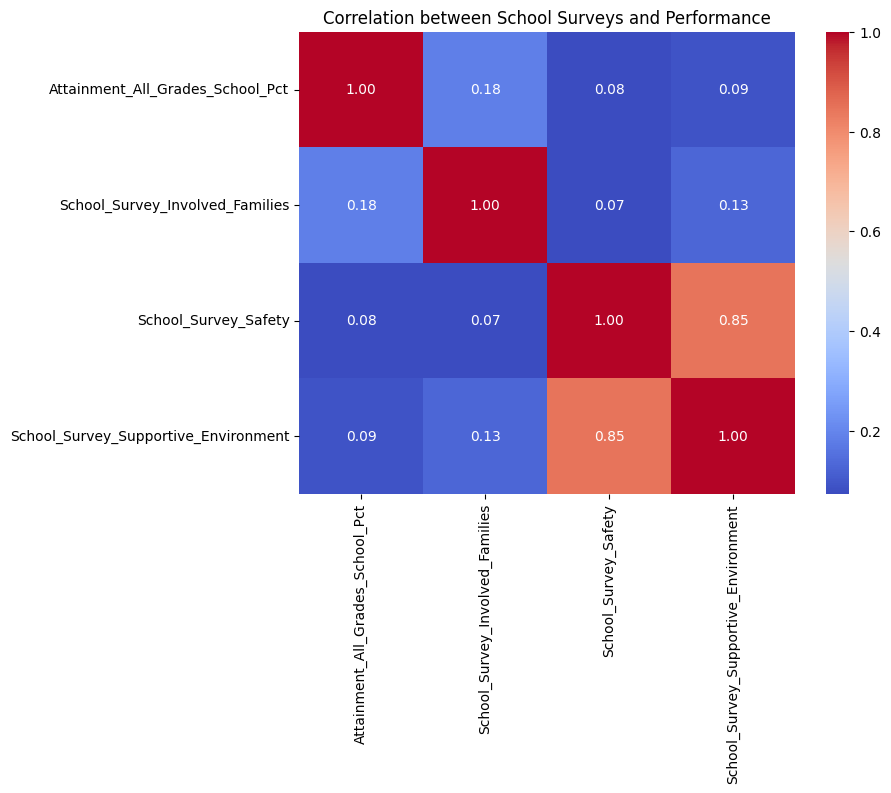

In [14]:
# 1. Prepare a subset of relevant columns
subset_data = cps_data[['Attainment_All_Grades_School_Pct', 'School_Survey_Involved_Families', 'School_Survey_Safety', 'School_Survey_Supportive_Environment']]

# 2. Calculate correlation matrix
correlation_matrix = subset_data.corr()

# 3. Plot the correlation matrix
plt.figure(figsize=(8, 6)) #fill in
plt.title('Correlation between School Surveys and Performance') #fill in 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") #cmap options include: viridis, plasma,inferno,magma,cividis,coolwarm,flag,ocean, and more! 
plt.show()

#### 4.3 School Performance Distribution

Finally, let's visualize the distribution (histogram) of school performances across all grades.

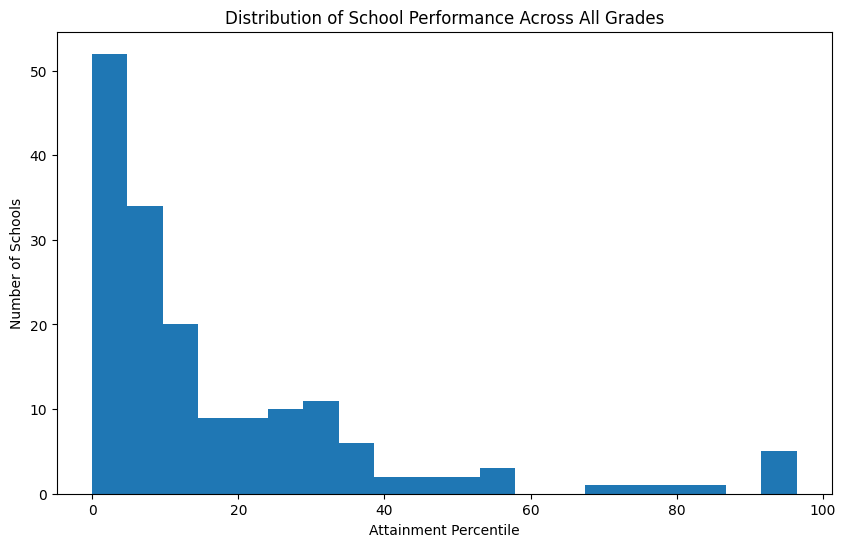

In [13]:
# Plotting distribution of school performance (the attainment) across all grades
cps_data['Attainment_All_Grades_School_Pct'].plot(kind='hist', bins=20, figsize=(10, 6), title='Distribution of School Performance Across All Grades')
plt.xlabel('Attainment Percentile')
plt.ylabel('Number of Schools')
plt.show()


*** 
### Conclusion

With a few extra lines of code, we can put these plots in subplots that are all in **one** figure. This tutorial walked you through the basic steps of loading, cleaning, and analyzing the Chicago Public Schools performance data. Through this analysis, we can gain insights into how schools perform across different regions and how different factors might correlate with school performance. Feel free to explore further and pose new questions as you dive deeper into the data.